In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import prince
import seaborn as sns

In [8]:
#conda install -c conda-forge statsmodels

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Henry\anaconda3

  added / updated specs:
    - statsmodels


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.8.30  |       h56e8100_0         155 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    statsmodels-0.14.0         |   py39h9128911_0         9.9 MB
    ------------------------------------------------------------
                                           Total:        10.2 MB

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2024.7.2-h~ --> conda-forge::ca-certificates-2024.8.30-h56e8100_0 
  certifi            pkgs/main/win-64::certifi-2024.7.4-py~ --> conda-forge/noarch::certifi-2024.8.30-pyhd8ed1ab_0 
  statsmodels                        



==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.7.1




In [2]:
import xgboost as xgb

C:\Users\Henry\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('final_syn_data.csv')

In [3]:
df = df.sample(frac=1).reset_index(drop=True).drop('row_number', axis=1)

In [5]:
len(df)

50000

In [6]:
df.tail()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
49995,Female,28,Yes,3,2,7,5,4,1,6,...,1-3 years,Monthly,20%-30%,Fixed Deposits,Health Care,Capital Appreciation,Fund Diversification,Assured Returns,Risk Free,Television
49996,Male,30,Yes,1,4,6,5,3,2,7,...,3-5 years,Monthly,20%-30%,Fixed Deposits,Health Care,Capital Appreciation,Better Returns,Assured Returns,Fixed Returns,Financial Consultants
49997,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
49998,Female,31,Yes,2,4,7,6,3,1,5,...,3-5 years,Monthly,20%-30%,Fixed Deposits,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Fixed Returns,Financial Consultants
49999,Male,26,Yes,3,4,6,5,1,2,7,...,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Dividend,Fund Diversification,Assured Returns,Fixed Returns,Financial Consultants


In [4]:
target_cols = ['Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']

In [8]:
y = df[target_cols]

In [9]:
y.head(5)

,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold
0,2,4,5,6,3,1,7
1,3,4,6,5,2,1,7
2,2,4,7,5,3,1,6
3,2,3,7,5,4,1,6
4,2,3,7,6,4,1,5


In [10]:
x = df.drop(target_cols, axis=1)

In [11]:
x.head()

,gender,age,Investment_Avenues,Stock_Marktet,Factor,Objective,Purpose,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,24,Yes,Yes,Risk,Capital Appreciation,Wealth Creation,3-5 years,Monthly,20%-30%,Equity,Health Care,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Newspapers and Magazines
1,Male,27,Yes,Yes,Returns,Capital Appreciation,Wealth Creation,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Financial Consultants
2,Male,35,Yes,Yes,Returns,Growth,Savings for Future,1-3 years,Weekly,20%-30%,Equity,Retirement Plan,Capital Appreciation,Fund Diversification,Safe Investment,Fixed Returns,Television
3,Male,27,Yes,Yes,Returns,Capital Appreciation,Wealth Creation,1-3 years,Monthly,20%-30%,Mutual Fund,Health Care,Capital Appreciation,Fund Diversification,Assured Returns,Risk Free,Newspapers and Magazines
4,Male,31,Yes,Yes,Risk,Growth,Savings for Future,1-3 years,Monthly,20%-30%,Fixed Deposits,Health Care,Capital Appreciation,Fund Diversification,Safe Investment,Fixed Returns,Television


In [12]:
X = pd.get_dummies(x)

In [ ]:
X.corr()[abs(X.corr())>0.5]

<AxesSubplot:>

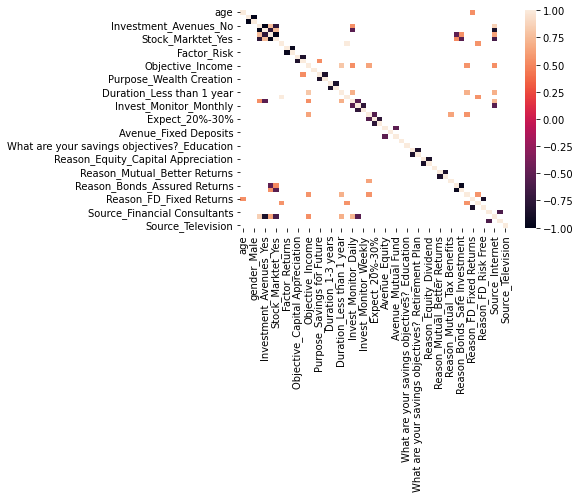

In [13]:
#X.corr()[abs(X.corr())>0.5]

sns.heatmap(X.corr()[abs(X.corr())>0.5])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = MultiOutputClassifier(RandomForestClassifier())
clf.fit(X_train, y_train)
clf.predict(X_test)

array([[2, 4, 7, ..., 3, 1, 6],
       [2, 4, 5, ..., 3, 1, 7],
       [3, 6, 4, ..., 5, 1, 7],
       ...,
       [5, 4, 3, ..., 7, 1, 6],
       [2, 3, 7, ..., 5, 1, 6],
       [2, 3, 7, ..., 5, 1, 6]], dtype=int64)

### approach 2 syn data with assign rank cols by age and gender

In [71]:
df1 = pd.read_csv('method2_syn_data.csv')

In [72]:
y = df1[target_cols]
x = df1.drop(target_cols, axis=1)
X = pd.get_dummies(x)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### approach 3 syn data with assign rank cols by age and gender

In [76]:
df1 = pd.read_csv('method3_syn_data.csv')

In [77]:
y = df1[target_cols]
x = df1.drop(target_cols, axis=1)
X = pd.get_dummies(x)

### multi-class classification using a one-vs-rest

In [6]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [101]:
df1 = pd.read_csv('final_syn_data.csv')

In [102]:
y = df1[target_cols]
x = df1.drop(target_cols, axis=1)
X = pd.get_dummies(x)

# ordinal regression

In [5]:
import scipy.stats as stats

from statsmodels.miscmodels.ordinal_model import OrderedModel

In [6]:
target_cols = ['Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']

In [7]:
target_df = df.copy()

In [8]:
target_df = target_df[target_cols]

In [9]:
target_df = target_df[target_cols].astype('category')

In [10]:
variable_df = df.drop(target_cols, axis=1)

In [11]:
target_df.Mutual_Funds = pd.Categorical(target_df.Mutual_Funds, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.Equity_Market = pd.Categorical(target_df.Equity_Market, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.Debentures = pd.Categorical(target_df.Debentures, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.Government_Bonds = pd.Categorical(target_df.Government_Bonds, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.Fixed_Deposits = pd.Categorical(target_df.Fixed_Deposits, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.PPF = pd.Categorical(target_df.PPF, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.Gold = pd.Categorical(target_df.Gold, ordered=True,categories=[7,6,5,4,3,2,1])

In [12]:
target_df.columns

Index(['Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds',
       'Fixed_Deposits', 'PPF', 'Gold'],
      dtype='object')

In [13]:
target_df['Mutual_Funds'].head()

0    2
1    3
2    3
3    2
4    4
Name: Mutual_Funds, dtype: category
Categories (7, int64): [7 < 6 < 5 < 4 < 3 < 2 < 1]

In [14]:
variable_df['gender'] = variable_df['gender'].apply(lambda x: 1 if x=='Male' else 2)
variable_df['gender'] = variable_df['gender'].astype('category')

In [15]:
variable_df['Investment_Avenues'] = variable_df['Investment_Avenues'].apply(lambda x: 1 if x=='No' else 2)
variable_df['Investment_Avenues'] = variable_df['Investment_Avenues'].astype('category')

In [16]:
variable_df['Stock_Marktet'] = variable_df['Stock_Marktet'].apply(lambda x: 1 if x=='No' else 2)
variable_df['Stock_Marktet'] = variable_df['Stock_Marktet'].astype('category')

In [17]:
variable_df['Factor'] = variable_df['Factor'].apply(lambda x: 1 if x=='Risk' else (2 if x=='Returns' else 3))
variable_df['Factor'] = variable_df['Factor'].astype('category')

In [18]:
variable_df['Objective'] = variable_df['Objective'].apply(lambda x: 1 if x=='Capital Appreciation' else (2 if x=='Growth' else 3))
variable_df['Objective'] = variable_df['Objective'].astype('category')

In [19]:
variable_df['Purpose'] = variable_df['Purpose'].apply(lambda x: 1 if x=='Wealth Creation' else (2 if x=='Savings for Future' else 3))
variable_df['Purpose'] = variable_df['Purpose'].astype('category')

In [20]:
variable_df['Duration'] = variable_df['Duration'].apply(lambda x: 1 if x=='Less than 1 year' else (2 if x=='1-3 years' else (3 if x=='3-5 years' else 4)))
variable_df['Duration'] = variable_df['Duration'].astype('category')

In [21]:
variable_df['Invest_Monitor'] = variable_df['Invest_Monitor'].apply(lambda x: 1 if x=='Monthly' else (2 if x=='Weekly' else 3))
variable_df['Invest_Monitor'] = variable_df['Invest_Monitor'].astype('category')

In [22]:
variable_df['Expect'] = variable_df['Expect'].apply(lambda x: 1 if x=='10%-20%' else (2 if x=='20%-30%' else 3))
variable_df['Expect'] = variable_df['Expect'].astype('category')

In [23]:
variable_df['Avenue'] = variable_df['Avenue'].apply(lambda x: 1 if x=='Mutual Fund' else (2 if x=='Fixed Deposits' else (3 if x=='Public Provident Fund' else 4)))
variable_df['Avenue'] = variable_df['Avenue'].astype('category')

In [24]:
variable_df['What are your savings objectives?'] = variable_df['What are your savings objectives?'].apply(lambda x: 1 if x=='Retirement Plan' else (2 if x=='Health Care' else 3))
variable_df['What are your savings objectives?'] = variable_df['What are your savings objectives?'].astype('category')

In [25]:
variable_df['Reason_Mutual'] = variable_df['Reason_Mutual'].apply(lambda x: 1 if x=='Better Returns' else (2 if x=='Fund Diversification' else 3))
variable_df['Reason_Mutual'] = variable_df['Reason_Mutual'].astype('category')

In [26]:
variable_df['Source'] = variable_df['Source'].apply(lambda x: 1 if x=='Newspapers and Magazines' else (2 if x=='Financial Consultants' else (3 if x=='Internet' else 4)))
variable_df['Source'] = variable_df['Source'].astype('category')

In [27]:
variable_df['Reason_Equity'] = variable_df['Reason_Equity'].apply(lambda x: 1 if x=='Dividend' else (2 if x=='Capital Appreciation' else 3))
variable_df['Reason_Equity'] = variable_df['Reason_Equity'].astype('category')

In [28]:
variable_df['Reason_Bonds'] = variable_df['Reason_Bonds'].apply(lambda x: 1 if x=='Assured Returns' else (2 if x=='Safe Investment' else 3))
variable_df['Reason_Bonds'] = variable_df['Reason_Bonds'].astype('category')

In [29]:
variable_df['Reason_FD'] = variable_df['Reason_FD'].apply(lambda x: 1 if x=='Fixed Returns' else (2 if x=='Risk Free' else 3))
variable_df['Reason_FD'] = variable_df['Reason_FD'].astype('category')

In [30]:
variable_df['Reason_FD'].unique()

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

In [31]:
final_df = pd.concat([variable_df, target_df], axis=1)

In [32]:
variable_df.dtypes

gender                               category
age                                     int64
Investment_Avenues                   category
Stock_Marktet                        category
Factor                               category
Objective                            category
Purpose                              category
Duration                             category
Invest_Monitor                       category
Expect                               category
Avenue                               category
What are your savings objectives?    category
Reason_Equity                        category
Reason_Mutual                        category
Reason_Bonds                         category
Reason_FD                            category
Source                               category
dtype: object

In [27]:
var_lst = ['gender', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Reason_Equity',
       'Reason_Mutual', 'Reason_Bonds', 'Reason_FD', 'Source']

In [45]:
fin_df.columns

Index(['age', 'gender_Female', 'gender_Male', 'Investment_Avenues_No',
       'Investment_Avenues_Yes', 'Stock_Marktet_No', 'Stock_Marktet_Yes',
       'Factor_Locking Period', 'Factor_Returns', 'Factor_Risk',
       'Objective_Capital Appreciation', 'Objective_Growth',
       'Objective_Income', 'Purpose_Returns', 'Purpose_Savings for Future',
       'Purpose_Wealth Creation', 'Duration_1-3 years', 'Duration_3-5 years',
       'Duration_Less than 1 year', 'Duration_More than 5 years',
       'Invest_Monitor_Daily', 'Invest_Monitor_Monthly',
       'Invest_Monitor_Weekly', 'Expect_10%-20%', 'Expect_20%-30%',
       'Expect_30%-40%', 'Avenue_Equity', 'Avenue_Fixed Deposits',
       'Avenue_Mutual Fund', 'Avenue_Public Provident Fund',
       'What are your savings objectives?_Education',
       'What are your savings objectives?_Health Care',
       'What are your savings objectives?_Retirement Plan',
       'Reason_Equity_Capital Appreciation', 'Reason_Equity_Dividend',
       'Reason_

In [28]:
nan_values = final_df.isna().sum()
print(nan_values[nan_values > 0])

Series([], dtype: int64)


In [43]:
final_df.dtypes

gender                               category
age                                     int64
Investment_Avenues                   category
Stock_Marktet                        category
Factor                               category
Objective                            category
Purpose                              category
Duration                             category
Invest_Monitor                       category
Expect                               category
Avenue                               category
What are your savings objectives?    category
Reason_Equity                        category
Reason_Mutual                        category
Reason_Bonds                         category
Reason_FD                            category
Source                               category
Mutual_Funds                         category
Equity_Market                        category
Debentures                           category
Government_Bonds                     category
Fixed_Deposits                    

# ordinal regression final df

In [33]:
mod_prob = OrderedModel(final_df[['Gold']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 0.952917
         Iterations: 89
         Function evaluations: 93
         Gradient evaluations: 93


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                   Gold   Log-Likelihood:                -47646.
Model:                   OrderedModel   AIC:                         9.533e+04
Method:            Maximum Likelihood   BIC:                         9.549e+04
Date:                Sun, 29 Sep 2024                                         
Time:                        16:10:23                                         
No. Observations:               50000                                         
Df Residuals:                   49982                                         
Df Model:                          13                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                               -0.4460      0.024    -18.931      0.000      -0.492      -0.400
age                                   0.0851      0.003     24.424      0.000       0.078       0.092
Investment_Avenues                  -11.3646      0.135    -84.245      0.000     -11.629     -11.100
Stock_Marktet                         6.2905      0.077     81.607      0.000       6.139       6.442
Factor                                1.9472      0.026     74.772      0.000       1.896       1.998
Objective                            -1.2174      0.026    -46.814      0.000      -1.268      -1.166
Purpose                              -1.0664      0.024    -44.853      0.000      -1.113      -1.020
Duration                              3.1618      0.027    116.690      0.000       3.109       3.215
Invest_Monitor                       -0.0485      0.025     -1.937      0.053      -0.098       0.001
Expect                               -4.1905      0.038   -108.936      0.000      -4.266      -4.115
Avenue                                0.7081      0.010     68.276      0.000       0.688       0.728
What are your savings objectives?     2.5643      0.027     95.731      0.000       2.512       2.617
Source                                0.2390      0.011     20.992      0.000       0.217       0.261
2/3                                  -8.5310      0.225    -37.981      0.000      -8.971      -8.091
3/4                                  -0.1665      0.028     -5.981      0.000      -0.221      -0.112
4/5                                   0.0077      0.019      0.406      0.684      -0.029       0.045
5/6                                   0.0851      0.013      6.377      0.000       0.059       0.111
6/7                                   1.2296      0.007    180.304      0.000       1.216       1.243
=====================================================================================================
"""

In [34]:
mod_prob = OrderedModel(final_df[['PPF']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.035123
         Iterations: 83
         Function evaluations: 88
         Gradient evaluations: 88


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    PPF   Log-Likelihood:                -51756.
Model:                   OrderedModel   AIC:                         1.035e+05
Method:            Maximum Likelihood   BIC:                         1.037e+05
Date:                Sun, 29 Sep 2024                                         
Time:                        16:10:43                                         
No. Observations:               50000                                         
Df Residuals:                   49982                                         
Df Model:                          13                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                               -1.0224      0.027    -37.357      0.000      -1.076      -0.969
age                                  -0.0676      0.004    -16.860      0.000      -0.075      -0.060
Investment_Avenues                   -2.4501      0.086    -28.522      0.000      -2.618      -2.282
Stock_Marktet                        -2.2236      0.069    -32.389      0.000      -2.358      -2.089
Factor                                1.9651      0.026     74.170      0.000       1.913       2.017
Objective                             0.6438      0.022     28.895      0.000       0.600       0.687
Purpose                               0.0650      0.023      2.847      0.004       0.020       0.110
Duration                              0.1821      0.022      8.337      0.000       0.139       0.225
Invest_Monitor                       -0.8993      0.024    -37.651      0.000      -0.946      -0.852
Expect                               -0.0877      0.027     -3.285      0.001      -0.140      -0.035
Avenue                                0.4589      0.010     47.065      0.000       0.440       0.478
What are your savings objectives?     0.7950      0.023     34.721      0.000       0.750       0.840
Source                               -0.3750      0.013    -28.877      0.000      -0.400      -0.350
1/2                                  -7.0412      0.220    -32.019      0.000      -7.472      -6.610
2/3                                   0.1598      0.011     14.416      0.000       0.138       0.181
3/4                                  -0.2442      0.016    -15.414      0.000      -0.275      -0.213
4/5                                  -0.4492      0.020    -22.865      0.000      -0.488      -0.411
5/6                                  -0.1194      0.019     -6.166      0.000      -0.157      -0.081
=====================================================================================================
"""

In [35]:
mod_prob = OrderedModel(final_df[['Fixed_Deposits']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source', 'Reason_FD']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.510458
         Iterations: 83
         Function evaluations: 88
         Gradient evaluations: 88


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:         Fixed_Deposits   Log-Likelihood:                -75523.
Model:                   OrderedModel   AIC:                         1.511e+05
Method:            Maximum Likelihood   BIC:                         1.513e+05
Date:                Sun, 29 Sep 2024                                         
Time:                        16:11:06                                         
No. Observations:               50000                                         
Df Residuals:                   49980                                         
Df Model:                          14                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                                1.8134      0.024     76.699      0.000       1.767       1.860
age                                  -0.0940      0.005    -20.449      0.000      -0.103      -0.085
Investment_Avenues                    5.4866      0.086     63.981      0.000       5.319       5.655
Stock_Marktet                        -3.1984      0.061    -52.101      0.000      -3.319      -3.078
Factor                                0.0032      0.020      0.156      0.876      -0.037       0.043
Objective                            -0.1149      0.021     -5.488      0.000      -0.156      -0.074
Purpose                               0.4323      0.023     18.539      0.000       0.387       0.478
Duration                             -1.1881      0.019    -61.618      0.000      -1.226      -1.150
Invest_Monitor                        0.8541      0.020     42.822      0.000       0.815       0.893
Expect                               -1.7172      0.032    -53.553      0.000      -1.780      -1.654
Avenue                               -0.4482      0.008    -53.525      0.000      -0.465      -0.432
What are your savings objectives?    -0.6761      0.021    -31.500      0.000      -0.718      -0.634
Source                               -0.2048      0.010    -20.853      0.000      -0.224      -0.186
Reason_FD                            -0.4719      0.022    -21.719      0.000      -0.514      -0.429
1/2                                  -5.4765      0.215    -25.502      0.000      -5.897      -5.056
2/3                                  -0.9388      0.019    -48.147      0.000      -0.977      -0.901
3/4                                   0.4011      0.008     48.552      0.000       0.385       0.417
4/5                                  -0.0125      0.010     -1.243      0.214      -0.032       0.007
5/6                                   0.5885      0.010     60.405      0.000       0.569       0.608
6/7                                  -0.1422      0.019     -7.412      0.000      -0.180      -0.105
=====================================================================================================
"""

In [36]:
mod_prob = OrderedModel(final_df[['Government_Bonds']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source', 'Reason_Bonds']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.070893
         Iterations: 202
         Function evaluations: 223
         Gradient evaluations: 223


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:       Government_Bonds   Log-Likelihood:                -53545.
Model:                   OrderedModel   AIC:                         1.071e+05
Method:            Maximum Likelihood   BIC:                         1.073e+05
Date:                Sun, 29 Sep 2024                                         
Time:                        16:11:58                                         
No. Observations:               50000                                         
Df Residuals:                   49980                                         
Df Model:                          14                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                               -0.7670      0.023    -33.002      0.000      -0.813      -0.721
age                                  -0.1424      0.004    -35.726      0.000      -0.150      -0.135
Investment_Avenues                  -19.5909     10.051     -1.949      0.051     -39.290       0.108
Stock_Marktet                        19.3190     10.051      1.922      0.055      -0.380      39.018
Factor                               -1.5644      0.024    -66.250      0.000      -1.611      -1.518
Objective                             1.1964      0.023     53.017      0.000       1.152       1.241
Purpose                              -2.3627      0.027    -86.690      0.000      -2.416      -2.309
Duration                             -0.0457      0.022     -2.085      0.037      -0.089      -0.003
Invest_Monitor                       -1.3370      0.023    -57.221      0.000      -1.383      -1.291
Expect                                0.7422      0.029     25.767      0.000       0.686       0.799
Avenue                                0.3058      0.009     33.126      0.000       0.288       0.324
What are your savings objectives?    -0.0158      0.021     -0.757      0.449      -0.057       0.025
Source                                0.3782      0.011     35.732      0.000       0.357       0.399
Reason_Bonds                          2.8674      0.035     83.027      0.000       2.800       2.935
1/2                                 -22.9454     10.053     -2.283      0.022     -42.648      -3.243
2/3                                   2.7109      0.668      4.058      0.000       1.401       4.020
3/4                                  -0.9480      0.028    -33.959      0.000      -1.003      -0.893
4/5                                   0.4446      0.010     43.903      0.000       0.425       0.464
5/6                                   1.1323      0.006    181.258      0.000       1.120       1.145
6/7                                   1.0599      0.011     98.283      0.000       1.039       1.081
=====================================================================================================
"""

In [37]:
mod_prob = OrderedModel(final_df[['Debentures']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

         Current function value: 0.460245
         Iterations: 500
         Function evaluations: 590
         Gradient evaluations: 590


C:\Users\Henry\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:             Debentures   Log-Likelihood:                -23012.
Model:                   OrderedModel   AIC:                         4.606e+04
Method:            Maximum Likelihood   BIC:                         4.623e+04
Date:                Sun, 29 Sep 2024                                         
Time:                        16:14:08                                         
No. Observations:               50000                                         
Df Residuals:                   49981                                         
Df Model:                          13                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                               -0.3531      0.036     -9.716      0.000      -0.424      -0.282
age                                  -0.3862      0.008    -46.713      0.000      -0.402      -0.370
Investment_Avenues                  -35.1926     34.590     -1.017      0.309    -102.989      32.603
Stock_Marktet                       113.7407     12.624      9.010      0.000      88.999     138.483
Factor                               -1.4512      0.052    -28.079      0.000      -1.553      -1.350
Objective                             4.9858      0.068     72.963      0.000       4.852       5.120
Purpose                               0.2939      0.032      9.315      0.000       0.232       0.356
Duration                             -5.1996      0.051   -101.199      0.000      -5.300      -5.099
Invest_Monitor                       -1.5845      0.043    -37.086      0.000      -1.668      -1.501
Expect                               58.6659     31.219      1.879      0.060      -2.522     119.854
Avenue                               -0.8629      0.014    -63.057      0.000      -0.890      -0.836
What are your savings objectives?    -2.8322      0.044    -63.678      0.000      -2.919      -2.745
Source                               -0.5318      0.020    -25.941      0.000      -0.572      -0.492
1/2                                 107.4374    126.756      0.848      0.397    -140.999     355.874
2/3                                   3.2254      0.203     15.870      0.000       2.827       3.624
3/4                                   4.4166      0.061     72.688      0.000       4.297       4.536
4/5                                   3.2185      0.203     15.863      0.000       2.821       3.616
5/6                                   0.8594      0.016     54.217      0.000       0.828       0.891
6/7                                   1.0172      0.010    106.996      0.000       0.999       1.036
=====================================================================================================
"""

In [38]:
mod_prob = OrderedModel(final_df[['Equity_Market']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source', 'Reason_Equity']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.091782
         Iterations: 81
         Function evaluations: 86
         Gradient evaluations: 86


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:          Equity_Market   Log-Likelihood:                -54589.
Model:                   OrderedModel   AIC:                         1.092e+05
Method:            Maximum Likelihood   BIC:                         1.094e+05
Date:                Sun, 29 Sep 2024                                         
Time:                        16:14:30                                         
No. Observations:               50000                                         
Df Residuals:                   49981                                         
Df Model:                          14                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                               -0.7514      0.023    -32.912      0.000      -0.796      -0.707
age                                   0.3131      0.004     85.947      0.000       0.306       0.320
Investment_Avenues                    0.6290      0.089      7.071      0.000       0.455       0.803
Stock_Marktet                        -2.2967      0.074    -30.907      0.000      -2.442      -2.151
Factor                               -1.3877      0.025    -54.786      0.000      -1.437      -1.338
Objective                            -1.9896      0.024    -83.962      0.000      -2.036      -1.943
Purpose                               0.3388      0.021     16.079      0.000       0.298       0.380
Duration                              2.5476      0.023    113.195      0.000       2.504       2.592
Invest_Monitor                        0.7653      0.022     34.510      0.000       0.722       0.809
Expect                               -1.7187      0.029    -59.212      0.000      -1.776      -1.662
Avenue                                0.5961      0.009     64.833      0.000       0.578       0.614
What are your savings objectives?     0.4214      0.022     19.554      0.000       0.379       0.464
Source                                0.0936      0.011      8.878      0.000       0.073       0.114
Reason_Equity                         1.4777      0.024     61.414      0.000       1.431       1.525
1/2                                   3.6041      0.191     18.835      0.000       3.229       3.979
2/3                                   0.9269      0.013     68.688      0.000       0.900       0.953
3/4                                   0.8803      0.008    112.744      0.000       0.865       0.896
4/5                                   1.0738      0.007    161.354      0.000       1.061       1.087
5/6                                   0.2429      0.016     14.858      0.000       0.211       0.275
=====================================================================================================
"""

In [39]:
mod_prob = OrderedModel(final_df[['Mutual_Funds']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source', 'Reason_Mutual']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.085860
         Iterations: 81
         Function evaluations: 86
         Gradient evaluations: 86


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:           Mutual_Funds   Log-Likelihood:                -54293.
Model:                   OrderedModel   AIC:                         1.086e+05
Method:            Maximum Likelihood   BIC:                         1.088e+05
Date:                Sun, 29 Sep 2024                                         
Time:                        16:14:51                                         
No. Observations:               50000                                         
Df Residuals:                   49981                                         
Df Model:                          14                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                                0.1448      0.022      6.485      0.000       0.101       0.189
age                                  -0.3066      0.004    -74.245      0.000      -0.315      -0.299
Investment_Avenues                    5.1248      0.090     57.123      0.000       4.949       5.301
Stock_Marktet                        -5.0985      0.064    -79.915      0.000      -5.224      -4.973
Factor                               -1.4054      0.025    -56.776      0.000      -1.454      -1.357
Objective                            -0.1487      0.022     -6.760      0.000      -0.192      -0.106
Purpose                               1.4924      0.024     61.574      0.000       1.445       1.540
Duration                              0.6420      0.019     33.026      0.000       0.604       0.680
Invest_Monitor                       -0.4458      0.020    -22.178      0.000      -0.485      -0.406
Expect                                0.4121      0.033     12.633      0.000       0.348       0.476
Avenue                               -0.1249      0.009    -14.227      0.000      -0.142      -0.108
What are your savings objectives?    -2.4081      0.026    -91.774      0.000      -2.460      -2.357
Source                                0.3876      0.011     35.675      0.000       0.366       0.409
Reason_Mutual                         1.3302      0.017     78.308      0.000       1.297       1.364
1/2                                 -11.1192      0.204    -54.464      0.000     -11.519     -10.719
2/3                                   1.3368      0.006    211.831      0.000       1.324       1.349
3/4                                   0.5725      0.009     63.846      0.000       0.555       0.590
4/5                                   0.0979      0.016      6.271      0.000       0.067       0.128
5/7                                   0.3130      0.020     15.766      0.000       0.274       0.352
=====================================================================================================
"""

# ordinal regression 40row dataset

In [40]:
df4 = pd.read_csv('Fin_data.csv')

In [41]:
len(df4)

40

In [42]:
target_cols = ['Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']

target_df = df4.copy()
target_df = target_df[target_cols]
variable_df = df4.drop(target_cols, axis=1)

target_df.Mutual_Funds = pd.Categorical(target_df.Mutual_Funds, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.Equity_Market = pd.Categorical(target_df.Equity_Market, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.Debentures = pd.Categorical(target_df.Debentures, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.Government_Bonds = pd.Categorical(target_df.Government_Bonds, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.Fixed_Deposits = pd.Categorical(target_df.Fixed_Deposits, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.PPF = pd.Categorical(target_df.PPF, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.Gold = pd.Categorical(target_df.Gold, ordered=True,categories=[7,6,5,4,3,2,1])

variable_df['gender'] = variable_df['gender'].apply(lambda x: 1 if x=='Male' else 2)
variable_df['gender'] = variable_df['gender'].astype('category')

variable_df['Investment_Avenues'] = variable_df['Investment_Avenues'].apply(lambda x: 1 if x=='No' else 2)
variable_df['Investment_Avenues'] = variable_df['Investment_Avenues'].astype('category')

variable_df['Stock_Marktet'] = variable_df['Stock_Marktet'].apply(lambda x: 1 if x=='No' else 2)
variable_df['Stock_Marktet'] = variable_df['Stock_Marktet'].astype('category')

variable_df['Factor'] = variable_df['Factor'].apply(lambda x: 1 if x=='Risk' else (2 if x=='Returns' else 3))
variable_df['Factor'] = variable_df['Factor'].astype('category')

variable_df['Objective'] = variable_df['Objective'].apply(lambda x: 1 if x=='Capital Appreciation' else (2 if x=='Growth' else 3))
variable_df['Objective'] = variable_df['Objective'].astype('category')

variable_df['Purpose'] = variable_df['Purpose'].apply(lambda x: 1 if x=='Wealth Creation' else (2 if x=='Savings for Future' else 3))
variable_df['Purpose'] = variable_df['Purpose'].astype('category')

variable_df['Duration'] = variable_df['Duration'].apply(lambda x: 1 if x=='Less than 1 year' else (2 if x=='1-3 years' else (3 if x=='3-5 years' else 4)))
variable_df['Duration'] = variable_df['Duration'].astype('category')

variable_df['Invest_Monitor'] = variable_df['Invest_Monitor'].apply(lambda x: 1 if x=='Monthly' else (2 if x=='Weekly' else 3))
variable_df['Invest_Monitor'] = variable_df['Invest_Monitor'].astype('category')

variable_df['Expect'] = variable_df['Expect'].apply(lambda x: 1 if x=='10%-20%' else (2 if x=='20%-30%' else 3))
variable_df['Expect'] = variable_df['Expect'].astype('category')

variable_df['Avenue'] = variable_df['Avenue'].apply(lambda x: 1 if x=='Mutual Fund' else (2 if x=='Fixed Deposits' else (3 if x=='Public Provident Fund' else 4)))
variable_df['Avenue'] = variable_df['Avenue'].astype('category')

variable_df['What are your savings objectives?'] = variable_df['What are your savings objectives?'].apply(lambda x: 1 if x=='Retirement Plan' else (2 if x=='Health Care' else 3))
variable_df['What are your savings objectives?'] = variable_df['What are your savings objectives?'].astype('category')

variable_df['Reason_Mutual'] = variable_df['Reason_Mutual'].apply(lambda x: 1 if x=='Better Returns' else (2 if x=='Fund Diversification' else 3))
variable_df['Reason_Mutual'] = variable_df['Reason_Mutual'].astype('category')

variable_df['Source'] = variable_df['Source'].apply(lambda x: 1 if x=='Newspapers and Magazines' else (2 if x=='Financial Consultants' else (3 if x=='Internet' else 4)))
variable_df['Source'] = variable_df['Source'].astype('category')

variable_df['Reason_Equity'] = variable_df['Reason_Equity'].apply(lambda x: 1 if x=='Dividend' else (2 if x=='Capital Appreciation' else 3))
variable_df['Reason_Equity'] = variable_df['Reason_Equity'].astype('category')

variable_df['Reason_Bonds'] = variable_df['Reason_Bonds'].apply(lambda x: 1 if x=='Assured Returns' else (2 if x=='Safe Investment' else 3))
variable_df['Reason_Bonds'] = variable_df['Reason_Bonds'].astype('category')

variable_df['Reason_FD'] = variable_df['Reason_FD'].apply(lambda x: 1 if x=='Fixed Returns' else (2 if x=='Risk Free' else 3))
variable_df['Reason_FD'] = variable_df['Reason_FD'].astype('category')

In [43]:
final_df = pd.concat([variable_df, target_df], axis=1)

In [44]:
len(final_df)

40

In [45]:

mod_prob = OrderedModel(final_df[['Gold']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 0.952917
         Iterations: 89
         Function evaluations: 93
         Gradient evaluations: 93


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                   Gold   Log-Likelihood:                -38.117
Model:                   OrderedModel   AIC:                             112.2
Method:            Maximum Likelihood   BIC:                             142.6
Date:                Sun, 29 Sep 2024                                         
Time:                        16:15:30                                         
No. Observations:                  40                                         
Df Residuals:                      22                                         
Df Model:                          13                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                               -0.4460      0.833     -0.535      0.592      -2.079       1.187
age                                   0.0851      0.123      0.691      0.490      -0.156       0.326
Investment_Avenues                  -11.3646      4.769     -2.383      0.017     -20.712      -2.017
Stock_Marktet                         6.2905      2.725      2.308      0.021       0.949      11.632
Factor                                1.9472      0.921      2.115      0.034       0.143       3.752
Objective                            -1.2174      0.919     -1.324      0.185      -3.019       0.585
Purpose                              -1.0664      0.841     -1.269      0.205      -2.714       0.581
Duration                              3.1618      0.958      3.300      0.001       1.284       5.039
Invest_Monitor                       -0.0485      0.886     -0.055      0.956      -1.784       1.687
Expect                               -4.1905      1.360     -3.081      0.002      -6.856      -1.525
Avenue                                0.7081      0.367      1.931      0.053      -0.011       1.427
What are your savings objectives?     2.5643      0.947      2.708      0.007       0.708       4.421
Source                                0.2390      0.402      0.594      0.553      -0.550       1.028
2/3                                  -8.5310      7.941     -1.074      0.283     -24.095       7.033
3/4                                  -0.1665      0.985     -0.169      0.866      -2.096       1.763
4/5                                   0.0077      0.670      0.011      0.991      -1.305       1.321
5/6                                   0.0851      0.472      0.180      0.857      -0.840       1.010
6/7                                   1.2296      0.241      5.100      0.000       0.757       1.702
=====================================================================================================
"""

In [46]:
mod_prob = OrderedModel(final_df[['PPF']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.035123
         Iterations: 83
         Function evaluations: 88
         Gradient evaluations: 88


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    PPF   Log-Likelihood:                -41.405
Model:                   OrderedModel   AIC:                             118.8
Method:            Maximum Likelihood   BIC:                             149.2
Date:                Sun, 29 Sep 2024                                         
Time:                        16:15:35                                         
No. Observations:                  40                                         
Df Residuals:                      22                                         
Df Model:                          13                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                               -1.0224      0.968     -1.057      0.291      -2.919       0.874
age                                  -0.0676      0.142     -0.477      0.633      -0.345       0.210
Investment_Avenues                   -2.4501      3.037     -0.807      0.420      -8.403       3.502
Stock_Marktet                        -2.2236      2.427     -0.916      0.360      -6.981       2.534
Factor                                1.9651      0.937      2.098      0.036       0.129       3.801
Objective                             0.6438      0.788      0.817      0.414      -0.900       2.188
Purpose                               0.0650      0.808      0.081      0.936      -1.518       1.648
Duration                              0.1821      0.772      0.236      0.814      -1.332       1.696
Invest_Monitor                       -0.8993      0.844     -1.065      0.287      -2.554       0.756
Expect                               -0.0877      0.943     -0.093      0.926      -1.937       1.761
Avenue                                0.4589      0.345      1.331      0.183      -0.217       1.135
What are your savings objectives?     0.7950      0.809      0.982      0.326      -0.792       2.381
Source                               -0.3750      0.459     -0.817      0.414      -1.275       0.525
1/2                                  -7.0412      7.775     -0.906      0.365     -22.280       8.197
2/3                                   0.1598      0.392      0.408      0.683      -0.608       0.928
3/4                                  -0.2442      0.560     -0.436      0.663      -1.342       0.854
4/5                                  -0.4492      0.694     -0.647      0.518      -1.810       0.912
5/6                                  -0.1194      0.685     -0.174      0.862      -1.461       1.222
=====================================================================================================
"""

In [47]:
mod_prob = OrderedModel(final_df[['Fixed_Deposits']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source', 'Reason_FD']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.510458
         Iterations: 83
         Function evaluations: 88
         Gradient evaluations: 88


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:         Fixed_Deposits   Log-Likelihood:                -60.418
Model:                   OrderedModel   AIC:                             160.8
Method:            Maximum Likelihood   BIC:                             194.6
Date:                Sun, 29 Sep 2024                                         
Time:                        16:15:36                                         
No. Observations:                  40                                         
Df Residuals:                      20                                         
Df Model:                          14                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                                1.8134      0.836      2.169      0.030       0.175       3.452
age                                  -0.0940      0.163     -0.578      0.563      -0.413       0.225
Investment_Avenues                    5.4866      3.032      1.810      0.070      -0.456      11.429
Stock_Marktet                        -3.1984      2.170     -1.474      0.141      -7.452       1.056
Factor                                0.0032      0.719      0.004      0.996      -1.407       1.413
Objective                            -0.1149      0.740     -0.155      0.877      -1.566       1.336
Purpose                               0.4323      0.825      0.524      0.600      -1.184       2.048
Duration                             -1.1881      0.682     -1.743      0.081      -2.524       0.148
Invest_Monitor                        0.8541      0.705      1.211      0.226      -0.528       2.236
Expect                               -1.7172      1.134     -1.515      0.130      -3.939       0.505
Avenue                               -0.4482      0.296     -1.514      0.130      -1.028       0.132
What are your savings objectives?    -0.6761      0.759     -0.891      0.373      -2.163       0.811
Source                               -0.2048      0.347     -0.590      0.555      -0.885       0.476
Reason_FD                            -0.4719      0.768     -0.614      0.539      -1.978       1.034
1/2                                  -5.4765      7.592     -0.721      0.471     -20.357       9.405
2/3                                  -0.9388      0.689     -1.362      0.173      -2.290       0.412
3/4                                   0.4011      0.292      1.373      0.170      -0.171       0.973
4/5                                  -0.0125      0.356     -0.035      0.972      -0.710       0.685
5/6                                   0.5885      0.344      1.709      0.088      -0.087       1.264
6/7                                  -0.1422      0.678     -0.210      0.834      -1.471       1.187
=====================================================================================================
"""

In [48]:
mod_prob = OrderedModel(final_df[['Government_Bonds']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source', 'Reason_Bonds']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.070893
         Iterations: 436
         Function evaluations: 524
         Gradient evaluations: 524


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:       Government_Bonds   Log-Likelihood:                -42.836
Model:                   OrderedModel   AIC:                             125.7
Method:            Maximum Likelihood   BIC:                             159.4
Date:                Sun, 29 Sep 2024                                         
Time:                        16:15:41                                         
No. Observations:                  40                                         
Df Residuals:                      20                                         
Df Model:                          14                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                               -0.7670      0.822     -0.933      0.351      -2.377       0.843
age                                  -0.1424      0.141     -1.010      0.312      -0.419       0.134
Investment_Avenues                  -23.4734    545.076     -0.043      0.966   -1091.803    1044.857
Stock_Marktet                        23.2015    545.072      0.043      0.966   -1045.121    1091.524
Factor                               -1.5644      0.835     -1.874      0.061      -3.201       0.072
Objective                             1.1964      0.798      1.500      0.134      -0.367       2.760
Purpose                              -2.3627      0.964     -2.452      0.014      -4.251      -0.474
Duration                             -0.0457      0.774     -0.059      0.953      -1.563       1.472
Invest_Monitor                       -1.3370      0.826     -1.618      0.106      -2.956       0.282
Expect                                0.7422      1.018      0.729      0.466      -1.254       2.738
Avenue                                0.3058      0.326      0.937      0.349      -0.334       0.946
What are your savings objectives?    -0.0158      0.739     -0.021      0.983      -1.465       1.434
Source                                0.3782      0.374      1.011      0.312      -0.355       1.112
Reason_Bonds                          2.8674      1.221      2.348      0.019       0.474       5.261
1/2                                 -26.8279    545.115     -0.049      0.961   -1095.233    1041.577
2/3                                   2.9405     28.801      0.102      0.919     -53.508      59.389
3/4                                  -0.9480      0.987     -0.961      0.337      -2.882       0.986
4/5                                   0.4446      0.358      1.242      0.214      -0.257       1.146
5/6                                   1.1323      0.221      5.127      0.000       0.699       1.565
6/7                                   1.0599      0.381      2.780      0.005       0.313       1.807
=====================================================================================================
"""

In [49]:
mod_prob = OrderedModel(final_df[['Debentures']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

         Current function value: 0.460245
         Iterations: 500
         Function evaluations: 574
         Gradient evaluations: 574


C:\Users\Henry\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:             Debentures   Log-Likelihood:                -18.410
Model:                   OrderedModel   AIC:                             74.82
Method:            Maximum Likelihood   BIC:                             106.9
Date:                Sun, 29 Sep 2024                                         
Time:                        16:15:45                                         
No. Observations:                  40                                         
Df Residuals:                      21                                         
Df Model:                          13                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                               -0.3531      1.285     -0.275      0.783      -2.872       2.165
age                                  -0.3862      0.292     -1.321      0.186      -0.959       0.187
Investment_Avenues                  -37.2366   2465.407     -0.015      0.988   -4869.345    4794.872
Stock_Marktet                       117.3700    370.517      0.317      0.751    -608.830     843.570
Factor                               -1.4512      1.827     -0.794      0.427      -5.033       2.130
Objective                             4.9858      2.416      2.064      0.039       0.251       9.721
Purpose                               0.2939      1.116      0.263      0.792      -1.893       2.481
Duration                             -5.1996      1.817     -2.862      0.004      -8.760      -1.639
Invest_Monitor                       -1.5845      1.511     -1.049      0.294      -4.545       1.376
Expect                               60.2507   2418.914      0.025      0.980   -4680.734    4801.235
Avenue                               -0.8629      0.484     -1.784      0.075      -1.811       0.085
What are your savings objectives?    -2.8321      1.572     -1.801      0.072      -5.914       0.250
Source                               -0.5318      0.725     -0.734      0.463      -1.952       0.889
1/2                                 111.0815   9705.916      0.011      0.991   -1.89e+04    1.91e+04
2/3                                   3.1743      6.622      0.479      0.632      -9.805      16.153
3/4                                   4.4633      1.956      2.281      0.023       0.629       8.298
4/5                                   3.2182      6.525      0.493      0.622      -9.570      16.006
5/6                                   0.8594      0.560      1.534      0.125      -0.239       1.958
6/7                                   1.0172      0.336      3.026      0.002       0.358       1.676
=====================================================================================================
"""

In [50]:
mod_prob = OrderedModel(final_df[['Equity_Market']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source', 'Reason_Equity']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.091782
         Iterations: 81
         Function evaluations: 86
         Gradient evaluations: 86


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:          Equity_Market   Log-Likelihood:                -43.671
Model:                   OrderedModel   AIC:                             125.3
Method:            Maximum Likelihood   BIC:                             157.4
Date:                Sun, 29 Sep 2024                                         
Time:                        16:15:46                                         
No. Observations:                  40                                         
Df Residuals:                      21                                         
Df Model:                          14                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                               -0.7514      0.807     -0.931      0.352      -2.333       0.831
age                                   0.3131      0.129      2.431      0.015       0.061       0.566
Investment_Avenues                    0.6290      3.145      0.200      0.841      -5.535       6.793
Stock_Marktet                        -2.2967      2.627     -0.874      0.382      -7.446       2.853
Factor                               -1.3877      0.896     -1.550      0.121      -3.143       0.368
Objective                            -1.9896      0.838     -2.375      0.018      -3.632      -0.348
Purpose                               0.3388      0.745      0.455      0.649      -1.121       1.799
Duration                              2.5476      0.796      3.202      0.001       0.988       4.107
Invest_Monitor                        0.7653      0.784      0.976      0.329      -0.771       2.302
Expect                               -1.7187      1.026     -1.675      0.094      -3.730       0.293
Avenue                                0.5961      0.325      1.834      0.067      -0.041       1.233
What are your savings objectives?     0.4214      0.762      0.553      0.580      -1.072       1.915
Source                                0.0936      0.373      0.251      0.802      -0.637       0.824
Reason_Equity                         1.4777      0.851      1.737      0.082      -0.190       3.145
1/2                                   3.6041      6.765      0.533      0.594      -9.655      16.864
2/3                                   0.9269      0.477      1.943      0.052      -0.008       1.862
3/4                                   0.8803      0.276      3.189      0.001       0.339       1.421
4/5                                   1.0738      0.235      4.564      0.000       0.613       1.535
5/6                                   0.2429      0.578      0.420      0.674      -0.890       1.376
=====================================================================================================
"""

In [51]:
mod_prob = OrderedModel(final_df[['Mutual_Funds']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source', 'Reason_Mutual']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.085860
         Iterations: 81
         Function evaluations: 86
         Gradient evaluations: 86


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:           Mutual_Funds   Log-Likelihood:                -43.434
Model:                   OrderedModel   AIC:                             124.9
Method:            Maximum Likelihood   BIC:                             157.0
Date:                Sun, 29 Sep 2024                                         
Time:                        16:15:47                                         
No. Observations:                  40                                         
Df Residuals:                      21                                         
Df Model:                          14                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                                0.1448      0.789      0.183      0.854      -1.403       1.692
age                                  -0.3066      0.146     -2.100      0.036      -0.593      -0.020
Investment_Avenues                    5.1248      3.172      1.616      0.106      -1.092      11.342
Stock_Marktet                        -5.0985      2.256     -2.260      0.024      -9.519      -0.678
Factor                               -1.4054      0.875     -1.606      0.108      -3.121       0.310
Objective                            -0.1487      0.778     -0.191      0.848      -1.673       1.376
Purpose                               1.4924      0.857      1.742      0.082      -0.187       3.172
Duration                              0.6420      0.687      0.934      0.350      -0.705       1.989
Invest_Monitor                       -0.4458      0.711     -0.627      0.530      -1.839       0.947
Expect                                0.4121      1.153      0.357      0.721      -1.848       2.672
Avenue                               -0.1249      0.310     -0.402      0.687      -0.733       0.484
What are your savings objectives?    -2.4081      0.928     -2.596      0.009      -4.226      -0.590
Source                                0.3876      0.384      1.009      0.313      -0.365       1.140
Reason_Mutual                         1.3302      0.601      2.215      0.027       0.153       2.507
1/2                                 -11.1192      7.218     -1.540      0.123     -25.266       3.028
2/3                                   1.3368      0.223      5.991      0.000       0.900       1.774
3/4                                   0.5725      0.317      1.806      0.071      -0.049       1.194
4/5                                   0.0979      0.552      0.177      0.859      -0.983       1.179
5/7                                   0.3130      0.702      0.446      0.656      -1.063       1.689
=====================================================================================================
"""

In [ ]:
#mod_prob = OrderedModel(final_df[['Mutual_Funds']],
#                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
#       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
# #      'Avenue', 'What are your savings objectives?', 'Source', 'Reason_Mutual']],
#                        distr='logit')
#
#res_prob = mod_prob.fit(method='bfgs')
#res_prob.summary()

In [186]:
#final_df['Reason_Mutual'].unique()

array(['Better Returns', 'Fund Diversification', 'Tax Benefits'],
      dtype=object)

In [96]:
#final_df.dtypes

gender                               category
age                                     int64
Investment_Avenues                   category
Stock_Marktet                           int64
Factor                                  int64
Objective                              object
Purpose                                object
Duration                               object
Invest_Monitor                         object
Expect                                 object
Avenue                                 object
What are your savings objectives?      object
Reason_Equity                          object
Reason_Mutual                          object
Reason_Bonds                           object
Reason_FD                              object
Source                                 object
Mutual_Funds                         category
Equity_Market                        category
Debentures                           category
Government_Bonds                     category
Fixed_Deposits                    

In [38]:
#final_df.columns

Index(['age', 'gender_Female', 'gender_Male', 'Investment_Avenues_No',
       'Investment_Avenues_Yes', 'Stock_Marktet_No', 'Stock_Marktet_Yes',
       'Factor_Locking Period', 'Factor_Returns', 'Factor_Risk',
       'Objective_Capital Appreciation', 'Objective_Growth',
       'Objective_Income', 'Purpose_Returns', 'Purpose_Savings for Future',
       'Purpose_Wealth Creation', 'Duration_1-3 years', 'Duration_3-5 years',
       'Duration_Less than 1 year', 'Duration_More than 5 years',
       'Invest_Monitor_Daily', 'Invest_Monitor_Monthly',
       'Invest_Monitor_Weekly', 'Expect_10%-20%', 'Expect_20%-30%',
       'Expect_30%-40%', 'Avenue_Equity', 'Avenue_Fixed Deposits',
       'Avenue_Mutual Fund', 'Avenue_Public Provident Fund',
       'What are your savings objectives?_Education',
       'What are your savings objectives?_Health Care',
       'What are your savings objectives?_Retirement Plan',
       'Reason_Equity_Capital Appreciation', 'Reason_Equity_Dividend',
       'Reason_

In [60]:
#final_df.loc[:, ~final_df.columns.isin(target_cols)].columns

Index(['age', 'gender_Female', 'gender_Male', 'Investment_Avenues_No',
       'Investment_Avenues_Yes', 'Stock_Marktet_No', 'Stock_Marktet_Yes',
       'Factor_Locking Period', 'Factor_Returns', 'Factor_Risk',
       'Objective_Capital Appreciation', 'Objective_Growth',
       'Objective_Income', 'Purpose_Returns', 'Purpose_Savings for Future',
       'Purpose_Wealth Creation', 'Duration_1-3 years', 'Duration_3-5 years',
       'Duration_Less than 1 year', 'Duration_More than 5 years',
       'Invest_Monitor_Daily', 'Invest_Monitor_Monthly',
       'Invest_Monitor_Weekly', 'Expect_10%-20%', 'Expect_20%-30%',
       'Expect_30%-40%', 'Avenue_Equity', 'Avenue_Fixed Deposits',
       'Avenue_Mutual Fund', 'Avenue_Public Provident Fund',
       'What are your savings objectives?_Education',
       'What are your savings objectives?_Health Care',
       'What are your savings objectives?_Retirement Plan',
       'Reason_Equity_Capital Appreciation', 'Reason_Equity_Dividend',
       'Reason_

In [21]:
#for i in final_df.loc[:, ~final_df.columns.isin(target_cols)].columns:
#    nobs = len(final_df)
#    final_df[i] = (np.arange(nobs) < (nobs / 2)).astype(float)

In [69]:
final_df[final_df['Investment_Avenues'] == 0]

,gender,age,Investment_Avenues,Stock_Marktet,Factor,Objective,Purpose,Duration,Invest_Monitor,Expect,...,Reason_Bonds,Reason_FD,Source,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold


In [68]:
final_df.dtypes

gender                               category
age                                     int64
Investment_Avenues                   category
Stock_Marktet                           int64
Factor                                  int64
Objective                              object
Purpose                                object
Duration                               object
Invest_Monitor                         object
Expect                                 object
Avenue                                 object
What are your savings objectives?      object
Reason_Equity                          object
Reason_Mutual                          object
Reason_Bonds                           object
Reason_FD                              object
Source                                 object
Mutual_Funds                         category
Equity_Market                        category
Debentures                           category
Government_Bonds                     category
Fixed_Deposits                    

# ordinal regression 2

In [52]:
df1 = pd.read_csv('method2_syn_data.csv')

In [53]:
df1.columns

Index(['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Reason_Equity',
       'Reason_Mutual', 'Reason_Bonds', 'Reason_FD', 'Source', 'Mutual_Funds',
       'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits',
       'PPF', 'Gold'],
      dtype='object')

In [58]:
target_cols = ['Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']

target_df = df1.copy()
target_df = target_df[target_cols]
variable_df = df1.drop(target_cols, axis=1)

target_df.Mutual_Funds = pd.Categorical(target_df.Mutual_Funds, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.Equity_Market = pd.Categorical(target_df.Equity_Market, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.Debentures = pd.Categorical(target_df.Debentures, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.Government_Bonds = pd.Categorical(target_df.Government_Bonds, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.Fixed_Deposits = pd.Categorical(target_df.Fixed_Deposits, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.PPF = pd.Categorical(target_df.PPF, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.Gold = pd.Categorical(target_df.Gold, ordered=True,categories=[7,6,5,4,3,2,1])

variable_df['gender'] = variable_df['gender'].apply(lambda x: 1 if x=='Male' else 2)
variable_df['gender'] = variable_df['gender'].astype('category')

variable_df['Investment_Avenues'] = variable_df['Investment_Avenues'].apply(lambda x: 1 if x=='No' else 2)
variable_df['Investment_Avenues'] = variable_df['Investment_Avenues'].astype('category')

variable_df['Stock_Marktet'] = variable_df['Stock_Marktet'].apply(lambda x: 1 if x=='No' else 2)
variable_df['Stock_Marktet'] = variable_df['Stock_Marktet'].astype('category')

variable_df['Factor'] = variable_df['Factor'].apply(lambda x: 1 if x=='Risk' else (2 if x=='Returns' else 3))
variable_df['Factor'] = variable_df['Factor'].astype('category')

variable_df['Objective'] = variable_df['Objective'].apply(lambda x: 1 if x=='Capital Appreciation' else (2 if x=='Growth' else 3))
variable_df['Objective'] = variable_df['Objective'].astype('category')

variable_df['Purpose'] = variable_df['Purpose'].apply(lambda x: 1 if x=='Wealth Creation' else (2 if x=='Savings for Future' else 3))
variable_df['Purpose'] = variable_df['Purpose'].astype('category')

variable_df['Duration'] = variable_df['Duration'].apply(lambda x: 1 if x=='Less than 1 year' else (2 if x=='1-3 years' else (3 if x=='3-5 years' else 4)))
variable_df['Duration'] = variable_df['Duration'].astype('category')

variable_df['Invest_Monitor'] = variable_df['Invest_Monitor'].apply(lambda x: 1 if x=='Monthly' else (2 if x=='Weekly' else 3))
variable_df['Invest_Monitor'] = variable_df['Invest_Monitor'].astype('category')

variable_df['Expect'] = variable_df['Expect'].apply(lambda x: 1 if x=='10%-20%' else (2 if x=='20%-30%' else 3))
variable_df['Expect'] = variable_df['Expect'].astype('category')

variable_df['Avenue'] = variable_df['Avenue'].apply(lambda x: 1 if x=='Mutual Fund' else (2 if x=='Fixed Deposits' else (3 if x=='Public Provident Fund' else 4)))
variable_df['Avenue'] = variable_df['Avenue'].astype('category')

variable_df['What are your savings objectives?'] = variable_df['What are your savings objectives?'].apply(lambda x: 1 if x=='Retirement Plan' else (2 if x=='Health Care' else 3))
variable_df['What are your savings objectives?'] = variable_df['What are your savings objectives?'].astype('category')

variable_df['Reason_Mutual'] = variable_df['Reason_Mutual'].apply(lambda x: 1 if x=='Better Returns' else (2 if x=='Fund Diversification' else 3))
variable_df['Reason_Mutual'] = variable_df['Reason_Mutual'].astype('category')

variable_df['Source'] = variable_df['Source'].apply(lambda x: 1 if x=='Newspapers and Magazines' else (2 if x=='Financial Consultants' else (3 if x=='Internet' else 4)))
variable_df['Source'] = variable_df['Source'].astype('category')

variable_df['Reason_Equity'] = variable_df['Reason_Equity'].apply(lambda x: 1 if x=='Dividend' else (2 if x=='Capital Appreciation' else 3))
variable_df['Reason_Equity'] = variable_df['Reason_Equity'].astype('category')

variable_df['Reason_Bonds'] = variable_df['Reason_Bonds'].apply(lambda x: 1 if x=='Assured Returns' else (2 if x=='Safe Investment' else 3))
variable_df['Reason_Bonds'] = variable_df['Reason_Bonds'].astype('category')

variable_df['Reason_FD'] = variable_df['Reason_FD'].apply(lambda x: 1 if x=='Fixed Returns' else (2 if x=='Risk Free' else 3))
variable_df['Reason_FD'] = variable_df['Reason_FD'].astype('category')

In [59]:
final_df = pd.concat([variable_df, target_df], axis=1)

In [60]:

mod_prob = OrderedModel(final_df[['Gold']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.291188
         Iterations: 43
         Function evaluations: 47
         Gradient evaluations: 47


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                   Gold   Log-Likelihood:                -64559.
Model:                   OrderedModel   AIC:                         1.292e+05
Method:            Maximum Likelihood   BIC:                         1.293e+05
Date:                Wed, 18 Sep 2024                                         
Time:                        16:09:50                                         
No. Observations:               50000                                         
Df Residuals:                   49982                                         
Df Model:                          13                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                                0.0004      0.018      0.024      0.981      -0.035       0.036
age                                  -0.0022      0.003     -0.862      0.388      -0.007       0.003
Investment_Avenues                    0.0206      0.026      0.789      0.430      -0.031       0.072
Stock_Marktet                        -0.0159      0.026     -0.619      0.536      -0.066       0.034
Factor                               -0.0003      0.017     -0.017      0.987      -0.033       0.032
Objective                            -0.0033      0.014     -0.228      0.820      -0.031       0.025
Purpose                              -0.0138      0.015     -0.929      0.353      -0.043       0.015
Duration                              0.0068      0.014      0.485      0.628      -0.021       0.034
Invest_Monitor                        0.0024      0.013      0.187      0.852      -0.023       0.028
Expect                                0.0191      0.018      1.034      0.301      -0.017       0.055
Avenue                                0.0003      0.007      0.037      0.971      -0.014       0.014
What are your savings objectives?    -0.0026      0.013     -0.199      0.843      -0.028       0.023
Source                               -0.0103      0.009     -1.202      0.229      -0.027       0.007
2/3                                  -3.7045      0.123    -30.118      0.000      -3.946      -3.463
3/4                                  -0.3295      0.029    -11.548      0.000      -0.385      -0.274
4/5                                  -0.2914      0.020    -14.605      0.000      -0.330      -0.252
5/6                                  -0.2096      0.014    -15.200      0.000      -0.237      -0.183
6/7                                   0.6959      0.006    119.668      0.000       0.685       0.707
=====================================================================================================
"""

In [61]:
mod_prob = OrderedModel(final_df[['PPF']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.279051
         Iterations: 22
         Function evaluations: 27
         Gradient evaluations: 27


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    PPF   Log-Likelihood:                -63953.
Model:                   OrderedModel   AIC:                         1.279e+05
Method:            Maximum Likelihood   BIC:                         1.281e+05
Date:                Wed, 18 Sep 2024                                         
Time:                        16:09:57                                         
No. Observations:               50000                                         
Df Residuals:                   49982                                         
Df Model:                          13                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                                0.0058      0.019      0.307      0.759      -0.031       0.043
age                                   0.0002      0.003      0.086      0.932      -0.005       0.006
Investment_Avenues                   -0.0255      0.027     -0.929      0.353      -0.079       0.028
Stock_Marktet                        -0.0355      0.027     -1.313      0.189      -0.088       0.017
Factor                                0.0466      0.017      2.667      0.008       0.012       0.081
Objective                             0.0052      0.015      0.342      0.732      -0.024       0.035
Purpose                              -0.0060      0.016     -0.387      0.699      -0.037       0.025
Duration                              0.0117      0.015      0.792      0.429      -0.017       0.041
Invest_Monitor                       -0.0105      0.014     -0.761      0.446      -0.038       0.017
Expect                                0.0018      0.019      0.092      0.927      -0.036       0.040
Avenue                                0.0045      0.008      0.603      0.546      -0.010       0.019
What are your savings objectives?     0.0119      0.014      0.855      0.392      -0.015       0.039
Source                               -0.0097      0.009     -1.069      0.285      -0.027       0.008
1/2                                   0.4063      0.126      3.214      0.001       0.158       0.654
2/3                                  -0.3663      0.011    -33.730      0.000      -0.388      -0.345
3/4                                  -0.7940      0.016    -50.128      0.000      -0.825      -0.763
4/5                                  -0.9279      0.020    -47.295      0.000      -0.966      -0.889
5/6                                  -0.5684      0.020    -28.771      0.000      -0.607      -0.530
=====================================================================================================
"""

In [62]:
mod_prob = OrderedModel(final_df[['Fixed_Deposits']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source', 'Reason_FD']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.789030
         Iterations: 44
         Function evaluations: 48
         Gradient evaluations: 48


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:         Fixed_Deposits   Log-Likelihood:                -89451.
Model:                   OrderedModel   AIC:                         1.789e+05
Method:            Maximum Likelihood   BIC:                         1.791e+05
Date:                Wed, 18 Sep 2024                                         
Time:                        16:10:10                                         
No. Observations:               50000                                         
Df Residuals:                   49980                                         
Df Model:                          14                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                               -0.0360      0.017     -2.115      0.034      -0.069      -0.003
age                                   0.0060      0.002      2.438      0.015       0.001       0.011
Investment_Avenues                    0.0155      0.025      0.628      0.530      -0.033       0.064
Stock_Marktet                        -0.0087      0.024     -0.359      0.720      -0.056       0.039
Factor                                0.0004      0.016      0.025      0.980      -0.030       0.031
Objective                            -0.0008      0.014     -0.056      0.955      -0.028       0.026
Purpose                              -0.0105      0.014     -0.747      0.455      -0.038       0.017
Duration                              0.0031      0.013      0.235      0.814      -0.023       0.029
Invest_Monitor                        0.0085      0.013      0.676      0.499      -0.016       0.033
Expect                               -0.0312      0.017     -1.788      0.074      -0.065       0.003
Avenue                            -9.708e-05      0.007     -0.014      0.989      -0.013       0.013
What are your savings objectives?    -0.0011      0.013     -0.086      0.932      -0.026       0.023
Source                                0.0012      0.008      0.153      0.879      -0.015       0.017
Reason_FD                             0.0225      0.014      1.642      0.101      -0.004       0.049
1/2                                  -1.2748      0.120    -10.645      0.000      -1.510      -1.040
2/3                                  -1.2458      0.020    -63.688      0.000      -1.284      -1.207
3/4                                   0.0943      0.008     11.588      0.000       0.078       0.110
4/5                                  -0.3131      0.010    -31.539      0.000      -0.333      -0.294
5/6                                   0.1950      0.010     20.515      0.000       0.176       0.214
6/7                                  -0.5684      0.020    -28.772      0.000      -0.607      -0.530
=====================================================================================================
"""

In [63]:
mod_prob = OrderedModel(final_df[['Government_Bonds']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source', 'Reason_Bonds']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.533733
         Iterations: 45
         Function evaluations: 50
         Gradient evaluations: 50


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:       Government_Bonds   Log-Likelihood:                -76687.
Model:                   OrderedModel   AIC:                         1.534e+05
Method:            Maximum Likelihood   BIC:                         1.536e+05
Date:                Wed, 18 Sep 2024                                         
Time:                        16:10:23                                         
No. Observations:               50000                                         
Df Residuals:                   49980                                         
Df Model:                          14                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                                0.0127      0.018      0.718      0.473      -0.022       0.047
age                                  -0.0033      0.003     -1.312      0.190      -0.008       0.002
Investment_Avenues                   -0.0448      0.026     -1.743      0.081      -0.095       0.006
Stock_Marktet                         0.0226      0.025      0.891      0.373      -0.027       0.072
Factor                                0.0016      0.016      0.098      0.922      -0.030       0.034
Objective                             0.0030      0.014      0.215      0.829      -0.025       0.031
Purpose                               0.0126      0.015      0.862      0.389      -0.016       0.041
Duration                             -0.0157      0.014     -1.140      0.254      -0.043       0.011
Invest_Monitor                       -0.0008      0.013     -0.065      0.948      -0.026       0.024
Expect                                0.0353      0.018      1.951      0.051      -0.000       0.071
Avenue                                0.0002      0.007      0.024      0.981      -0.014       0.014
What are your savings objectives?    -0.0027      0.013     -0.209      0.834      -0.028       0.023
Source                               -0.0048      0.008     -0.564      0.573      -0.021       0.012
Reason_Bonds                          0.0127      0.018      0.722      0.470      -0.022       0.047
1/2                                  -3.7227      0.122    -30.455      0.000      -3.962      -3.483
2/3                                   0.5410      0.015     35.763      0.000       0.511       0.571
3/4                                  -1.5544      0.028    -55.552      0.000      -1.609      -1.500
4/5                                   0.0038      0.010      0.380      0.704      -0.016       0.024
5/6                                   0.6770      0.006    117.103      0.000       0.666       0.688
6/7                                   0.5352      0.011     48.951      0.000       0.514       0.557
=====================================================================================================
"""

In [64]:
mod_prob = OrderedModel(final_df[['Debentures']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.471568
         Iterations: 47
         Function evaluations: 50
         Gradient evaluations: 50


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:             Debentures   Log-Likelihood:                -73578.
Model:                   OrderedModel   AIC:                         1.472e+05
Method:            Maximum Likelihood   BIC:                         1.474e+05
Date:                Wed, 18 Sep 2024                                         
Time:                        16:10:36                                         
No. Observations:               50000                                         
Df Residuals:                   49981                                         
Df Model:                          13                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                               -0.0119      0.018     -0.661      0.509      -0.047       0.023
age                                  -0.0016      0.003     -0.638      0.524      -0.007       0.003
Investment_Avenues                    0.0017      0.026      0.066      0.947      -0.049       0.053
Stock_Marktet                        -0.0080      0.026     -0.313      0.755      -0.058       0.042
Factor                               -0.0205      0.017     -1.235      0.217      -0.053       0.012
Objective                             0.0106      0.014      0.738      0.461      -0.018       0.039
Purpose                               0.0165      0.015      1.108      0.268      -0.013       0.046
Duration                             -0.0007      0.014     -0.047      0.963      -0.028       0.027
Invest_Monitor                        0.0071      0.013      0.543      0.587      -0.019       0.033
Expect                               -0.0043      0.018     -0.235      0.814      -0.040       0.032
Avenue                               -0.0156      0.007     -2.189      0.029      -0.030      -0.002
What are your savings objectives?    -0.0018      0.013     -0.140      0.889      -0.028       0.024
Source                                0.0146      0.009      1.704      0.088      -0.002       0.031
1/2                                  -3.7378      0.123    -30.412      0.000      -3.979      -3.497
2/3                                  -0.3298      0.029    -11.557      0.000      -0.386      -0.274
3/4                                   0.1905      0.014     13.372      0.000       0.163       0.218
4/5                                  -0.6974      0.016    -43.950      0.000      -0.729      -0.666
5/6                                  -0.9428      0.016    -59.654      0.000      -0.974      -0.912
6/7                                  -0.1654      0.009    -17.953      0.000      -0.183      -0.147
=====================================================================================================
"""

In [65]:
mod_prob = OrderedModel(final_df[['Equity_Market']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source', 'Reason_Equity']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.481292
         Iterations: 47
         Function evaluations: 52
         Gradient evaluations: 52


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:          Equity_Market   Log-Likelihood:                -74065.
Model:                   OrderedModel   AIC:                         1.482e+05
Method:            Maximum Likelihood   BIC:                         1.483e+05
Date:                Wed, 18 Sep 2024                                         
Time:                        16:10:50                                         
No. Observations:               50000                                         
Df Residuals:                   49981                                         
Df Model:                          14                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                                0.0466      0.018      2.658      0.008       0.012       0.081
age                                   0.0010      0.003      0.399      0.690      -0.004       0.006
Investment_Avenues                    0.0197      0.026      0.770      0.442      -0.030       0.070
Stock_Marktet                         0.0417      0.025      1.665      0.096      -0.007       0.091
Factor                               -0.0123      0.016     -0.761      0.447      -0.044       0.019
Objective                             0.0035      0.014      0.249      0.803      -0.024       0.031
Purpose                              -0.0071      0.014     -0.491      0.623      -0.035       0.021
Duration                              0.0083      0.014      0.605      0.545      -0.019       0.035
Invest_Monitor                       -0.0162      0.013     -1.268      0.205      -0.041       0.009
Expect                                0.0246      0.018      1.363      0.173      -0.011       0.060
Avenue                                0.0054      0.007      0.773      0.439      -0.008       0.019
What are your savings objectives?     0.0096      0.013      0.751      0.453      -0.016       0.035
Source                                0.0029      0.008      0.347      0.728      -0.014       0.019
Reason_Equity                        -0.0267      0.018     -1.471      0.141      -0.062       0.009
1/2                                  -2.7359      0.122    -22.394      0.000      -2.975      -2.496
2/3                                   0.3322      0.013     25.928      0.000       0.307       0.357
3/4                                   0.3722      0.007     49.981      0.000       0.358       0.387
4/5                                   0.7161      0.006    110.449      0.000       0.703       0.729
5/6                                  -0.0014      0.016     -0.084      0.933      -0.033       0.031
=====================================================================================================
"""

In [66]:
mod_prob = OrderedModel(final_df[['Mutual_Funds']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source', 'Reason_Mutual']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.340290
         Iterations: 44
         Function evaluations: 49
         Gradient evaluations: 49


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:           Mutual_Funds   Log-Likelihood:                -67014.
Model:                   OrderedModel   AIC:                         1.341e+05
Method:            Maximum Likelihood   BIC:                         1.342e+05
Date:                Wed, 18 Sep 2024                                         
Time:                        16:11:04                                         
No. Observations:               50000                                         
Df Residuals:                   49981                                         
Df Model:                          14                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                                0.0194      0.018      1.064      0.287      -0.016       0.055
age                                   0.0010      0.003      0.394      0.694      -0.004       0.006
Investment_Avenues                    0.0097      0.027      0.365      0.715      -0.042       0.062
Stock_Marktet                         0.0172      0.026      0.658      0.510      -0.034       0.068
Factor                               -0.0190      0.017     -1.128      0.259      -0.052       0.014
Objective                             0.0015      0.015      0.104      0.917      -0.027       0.030
Purpose                               0.0130      0.015      0.864      0.388      -0.016       0.042
Duration                              0.0074      0.014      0.522      0.602      -0.020       0.035
Invest_Monitor                       -0.0047      0.013     -0.354      0.723      -0.031       0.021
Expect                               -0.0245      0.019     -1.315      0.189      -0.061       0.012
Avenue                                0.0130      0.007      1.794      0.073      -0.001       0.027
What are your savings objectives?    -0.0275      0.013     -2.065      0.039      -0.054      -0.001
Source                               -0.0074      0.009     -0.851      0.395      -0.024       0.010
Reason_Mutual                         0.0145      0.013      1.099      0.272      -0.011       0.040
1/2                                  -2.1524      0.124    -17.306      0.000      -2.396      -1.909
2/3                                   0.9964      0.006    175.483      0.000       0.985       1.008
3/4                                   0.2021      0.009     22.894      0.000       0.185       0.219
4/5                                  -0.2513      0.016    -15.606      0.000      -0.283      -0.220
5/7                                   0.1409      0.021      6.844      0.000       0.101       0.181
=====================================================================================================
"""

# ordinal regression 3

In [67]:
df2 = pd.read_csv('method3_syn_data.csv')

In [68]:
target_cols = ['Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']

target_df = df2.copy()
target_df = target_df[target_cols]
variable_df = df2.drop(target_cols, axis=1)

target_df.Mutual_Funds = pd.Categorical(target_df.Mutual_Funds, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.Equity_Market = pd.Categorical(target_df.Equity_Market, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.Debentures = pd.Categorical(target_df.Debentures, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.Government_Bonds = pd.Categorical(target_df.Government_Bonds, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.Fixed_Deposits = pd.Categorical(target_df.Fixed_Deposits, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.PPF = pd.Categorical(target_df.PPF, ordered=True,categories=[7,6,5,4,3,2,1])
target_df.Gold = pd.Categorical(target_df.Gold, ordered=True,categories=[7,6,5,4,3,2,1])

variable_df['gender'] = variable_df['gender'].apply(lambda x: 1 if x=='Male' else 2)
variable_df['gender'] = variable_df['gender'].astype('category')

variable_df['Investment_Avenues'] = variable_df['Investment_Avenues'].apply(lambda x: 1 if x=='No' else 2)
variable_df['Investment_Avenues'] = variable_df['Investment_Avenues'].astype('category')

variable_df['Stock_Marktet'] = variable_df['Stock_Marktet'].apply(lambda x: 1 if x=='No' else 2)
variable_df['Stock_Marktet'] = variable_df['Stock_Marktet'].astype('category')

variable_df['Factor'] = variable_df['Factor'].apply(lambda x: 1 if x=='Risk' else (2 if x=='Returns' else 3))
variable_df['Factor'] = variable_df['Factor'].astype('category')

variable_df['Objective'] = variable_df['Objective'].apply(lambda x: 1 if x=='Capital Appreciation' else (2 if x=='Growth' else 3))
variable_df['Objective'] = variable_df['Objective'].astype('category')

variable_df['Purpose'] = variable_df['Purpose'].apply(lambda x: 1 if x=='Wealth Creation' else (2 if x=='Savings for Future' else 3))
variable_df['Purpose'] = variable_df['Purpose'].astype('category')

variable_df['Duration'] = variable_df['Duration'].apply(lambda x: 1 if x=='Less than 1 year' else (2 if x=='1-3 years' else (3 if x=='3-5 years' else 4)))
variable_df['Duration'] = variable_df['Duration'].astype('category')

variable_df['Invest_Monitor'] = variable_df['Invest_Monitor'].apply(lambda x: 1 if x=='Monthly' else (2 if x=='Weekly' else 3))
variable_df['Invest_Monitor'] = variable_df['Invest_Monitor'].astype('category')

variable_df['Expect'] = variable_df['Expect'].apply(lambda x: 1 if x=='10%-20%' else (2 if x=='20%-30%' else 3))
variable_df['Expect'] = variable_df['Expect'].astype('category')

variable_df['Avenue'] = variable_df['Avenue'].apply(lambda x: 1 if x=='Mutual Fund' else (2 if x=='Fixed Deposits' else (3 if x=='Public Provident Fund' else 4)))
variable_df['Avenue'] = variable_df['Avenue'].astype('category')

variable_df['What are your savings objectives?'] = variable_df['What are your savings objectives?'].apply(lambda x: 1 if x=='Retirement Plan' else (2 if x=='Health Care' else 3))
variable_df['What are your savings objectives?'] = variable_df['What are your savings objectives?'].astype('category')

variable_df['Reason_Mutual'] = variable_df['Reason_Mutual'].apply(lambda x: 1 if x=='Better Returns' else (2 if x=='Fund Diversification' else 3))
variable_df['Reason_Mutual'] = variable_df['Reason_Mutual'].astype('category')

variable_df['Source'] = variable_df['Source'].apply(lambda x: 1 if x=='Newspapers and Magazines' else (2 if x=='Financial Consultants' else (3 if x=='Internet' else 4)))
variable_df['Source'] = variable_df['Source'].astype('category')

variable_df['Reason_Equity'] = variable_df['Reason_Equity'].apply(lambda x: 1 if x=='Dividend' else (2 if x=='Capital Appreciation' else 3))
variable_df['Reason_Equity'] = variable_df['Reason_Equity'].astype('category')

variable_df['Reason_Bonds'] = variable_df['Reason_Bonds'].apply(lambda x: 1 if x=='Assured Returns' else (2 if x=='Safe Investment' else 3))
variable_df['Reason_Bonds'] = variable_df['Reason_Bonds'].astype('category')

variable_df['Reason_FD'] = variable_df['Reason_FD'].apply(lambda x: 1 if x=='Fixed Returns' else (2 if x=='Risk Free' else 3))
variable_df['Reason_FD'] = variable_df['Reason_FD'].astype('category')

In [69]:
final_df = pd.concat([variable_df, target_df], axis=1)

In [70]:
mod_prob = OrderedModel(final_df[['Gold']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.274679
         Iterations: 52
         Function evaluations: 55
         Gradient evaluations: 55


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                   Gold   Log-Likelihood:                -63734.
Model:                   OrderedModel   AIC:                         1.275e+05
Method:            Maximum Likelihood   BIC:                         1.277e+05
Date:                Wed, 18 Sep 2024                                         
Time:                        16:11:17                                         
No. Observations:               50000                                         
Df Residuals:                   49982                                         
Df Model:                          13                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                                0.4305      0.018     23.490      0.000       0.395       0.466
age                                  -0.0894      0.003    -33.759      0.000      -0.095      -0.084
Investment_Avenues                    0.0098      0.027      0.369      0.712      -0.042       0.062
Stock_Marktet                         0.2131      0.027      7.813      0.000       0.160       0.267
Factor                                0.0013      0.017      0.081      0.935      -0.031       0.034
Objective                            -0.0119      0.014     -0.832      0.405      -0.040       0.016
Purpose                              -0.0419      0.015     -2.869      0.004      -0.071      -0.013
Duration                             -0.0005      0.014     -0.032      0.974      -0.028       0.027
Invest_Monitor                        0.0022      0.013      0.162      0.871      -0.024       0.028
Expect                               -0.0021      0.019     -0.110      0.912      -0.039       0.034
Avenue                               -0.0044      0.007     -0.616      0.538      -0.018       0.010
What are your savings objectives?     0.0029      0.013      0.221      0.825      -0.023       0.029
Source                               -0.0009      0.009     -0.106      0.916      -0.018       0.016
2/3                                  -5.4493      0.127    -42.967      0.000      -5.698      -5.201
3/4                                  -0.1431      0.027     -5.283      0.000      -0.196      -0.090
4/5                                  -0.4535      0.022    -20.420      0.000      -0.497      -0.410
5/6                                  -0.0442      0.013     -3.434      0.001      -0.069      -0.019
6/7                                   0.6200      0.006     99.803      0.000       0.608       0.632
=====================================================================================================
"""

In [71]:
mod_prob = OrderedModel(final_df[['PPF']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.281425
         Iterations: 61
         Function evaluations: 65
         Gradient evaluations: 65


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    PPF   Log-Likelihood:                -64071.
Model:                   OrderedModel   AIC:                         1.282e+05
Method:            Maximum Likelihood   BIC:                         1.283e+05
Date:                Wed, 18 Sep 2024                                         
Time:                        16:11:32                                         
No. Observations:               50000                                         
Df Residuals:                   49982                                         
Df Model:                          13                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                                0.5578      0.020     27.928      0.000       0.519       0.597
age                                  -0.2129      0.003    -68.950      0.000      -0.219      -0.207
Investment_Avenues                   -0.0390      0.027     -1.418      0.156      -0.093       0.015
Stock_Marktet                        -0.0091      0.027     -0.342      0.732      -0.061       0.043
Factor                                0.0159      0.018      0.901      0.368      -0.019       0.051
Objective                            -0.0051      0.015     -0.332      0.740      -0.035       0.025
Purpose                              -0.0971      0.016     -5.970      0.000      -0.129      -0.065
Duration                             -0.0037      0.015     -0.245      0.806      -0.033       0.026
Invest_Monitor                       -0.0149      0.014     -1.072      0.284      -0.042       0.012
Expect                               -0.0182      0.019     -0.936      0.349      -0.056       0.020
Avenue                                0.0203      0.008      2.674      0.007       0.005       0.035
What are your savings objectives?     0.0038      0.014      0.273      0.785      -0.023       0.031
Source                               -0.0027      0.009     -0.292      0.771      -0.021       0.015
1/2                                  -5.0987      0.131    -38.820      0.000      -5.356      -4.841
2/3                                  -0.3977      0.011    -35.550      0.000      -0.420      -0.376
3/4                                  -0.7684      0.016    -48.761      0.000      -0.799      -0.738
4/5                                  -0.7292      0.018    -41.242      0.000      -0.764      -0.695
5/6                                  -0.2290      0.016    -13.988      0.000      -0.261      -0.197
=====================================================================================================
"""

In [72]:
mod_prob = OrderedModel(final_df[['Fixed_Deposits']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source', 'Reason_FD']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.742270
         Iterations: 58
         Function evaluations: 62
         Gradient evaluations: 62


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:         Fixed_Deposits   Log-Likelihood:                -87113.
Model:                   OrderedModel   AIC:                         1.743e+05
Method:            Maximum Likelihood   BIC:                         1.744e+05
Date:                Wed, 18 Sep 2024                                         
Time:                        16:11:48                                         
No. Observations:               50000                                         
Df Residuals:                   49980                                         
Df Model:                          14                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                                0.8196      0.018     45.697      0.000       0.784       0.855
age                                  -0.0637      0.003    -23.598      0.000      -0.069      -0.058
Investment_Avenues                    0.0050      0.025      0.199      0.843      -0.044       0.054
Stock_Marktet                        -0.2223      0.025     -8.919      0.000      -0.271      -0.173
Factor                                0.0009      0.016      0.055      0.957      -0.030       0.032
Objective                            -0.0054      0.014     -0.392      0.695      -0.032       0.021
Purpose                               0.0243      0.014      1.755      0.079      -0.003       0.051
Duration                              0.0029      0.013      0.222      0.824      -0.023       0.029
Invest_Monitor                        0.0104      0.012      0.829      0.407      -0.014       0.035
Expect                               -0.0054      0.018     -0.309      0.757      -0.040       0.029
Avenue                                0.0056      0.007      0.820      0.412      -0.008       0.019
What are your savings objectives?    -0.0212      0.013     -1.689      0.091      -0.046       0.003
Source                               -0.0080      0.008     -0.986      0.324      -0.024       0.008
Reason_FD                             0.0055      0.014      0.400      0.689      -0.021       0.032
1/2                                  -2.6013      0.127    -20.459      0.000      -2.850      -2.352
2/3                                  -1.1946      0.020    -60.022      0.000      -1.234      -1.156
3/4                                   0.1855      0.008     22.608      0.000       0.169       0.202
4/5                                  -0.2611      0.010    -25.889      0.000      -0.281      -0.241
5/6                                   0.3108      0.009     34.595      0.000       0.293       0.328
6/7                                  -0.1196      0.017     -7.051      0.000      -0.153      -0.086
=====================================================================================================
"""

In [73]:
mod_prob = OrderedModel(final_df[['Government_Bonds']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source', 'Reason_Bonds']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.581529
         Iterations: 59
         Function evaluations: 64
         Gradient evaluations: 64


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:       Government_Bonds   Log-Likelihood:                -79076.
Model:                   OrderedModel   AIC:                         1.582e+05
Method:            Maximum Likelihood   BIC:                         1.584e+05
Date:                Wed, 18 Sep 2024                                         
Time:                        16:12:05                                         
No. Observations:               50000                                         
Df Residuals:                   49980                                         
Df Model:                          14                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                               -0.5575      0.018    -30.331      0.000      -0.593      -0.521
age                                  -0.0301      0.003    -11.647      0.000      -0.035      -0.025
Investment_Avenues                    0.0244      0.026      0.945      0.344      -0.026       0.075
Stock_Marktet                         0.1427      0.026      5.418      0.000       0.091       0.194
Factor                               -0.0143      0.016     -0.882      0.378      -0.046       0.017
Objective                             0.0057      0.014      0.408      0.683      -0.022       0.033
Purpose                               0.0453      0.014      3.129      0.002       0.017       0.074
Duration                             -0.0228      0.014     -1.659      0.097      -0.050       0.004
Invest_Monitor                     2.699e-05      0.013      0.002      0.998      -0.025       0.025
Expect                                0.0030      0.018      0.165      0.869      -0.032       0.038
Avenue                               -0.0184      0.007     -2.647      0.008      -0.032      -0.005
What are your savings objectives?    -0.0104      0.013     -0.810      0.418      -0.036       0.015
Source                                0.0200      0.008      2.371      0.018       0.003       0.037
Reason_Bonds                          0.0542      0.017      3.108      0.002       0.020       0.088
1/2                                  -4.1976      0.122    -34.461      0.000      -4.436      -3.959
2/3                                   0.2026      0.014     14.145      0.000       0.175       0.231
3/4                                  -2.0883      0.035    -58.983      0.000      -2.158      -2.019
4/5                                  -0.0305      0.010     -2.986      0.003      -0.050      -0.010
5/6                                   0.5819      0.006     96.151      0.000       0.570       0.594
6/7                                   0.4996      0.010     48.203      0.000       0.479       0.520
=====================================================================================================
"""

In [74]:
mod_prob = OrderedModel(final_df[['Debentures']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.377941
         Iterations: 62
         Function evaluations: 67
         Gradient evaluations: 67


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:             Debentures   Log-Likelihood:                -68897.
Model:                   OrderedModel   AIC:                         1.378e+05
Method:            Maximum Likelihood   BIC:                         1.380e+05
Date:                Wed, 18 Sep 2024                                         
Time:                        16:12:22                                         
No. Observations:               50000                                         
Df Residuals:                   49981                                         
Df Model:                          13                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                               -1.2808      0.019    -66.268      0.000      -1.319      -1.243
age                                   0.2645      0.003     85.060      0.000       0.258       0.271
Investment_Avenues                    0.0337      0.026      1.279      0.201      -0.018       0.085
Stock_Marktet                        -0.0212      0.025     -0.844      0.399      -0.071       0.028
Factor                               -0.0287      0.017     -1.683      0.092      -0.062       0.005
Objective                             0.0133      0.015      0.895      0.371      -0.016       0.042
Purpose                               0.0811      0.016      5.218      0.000       0.051       0.112
Duration                             -0.0086      0.014     -0.607      0.544      -0.037       0.019
Invest_Monitor                        0.0217      0.013      1.636      0.102      -0.004       0.048
Expect                                0.0267      0.019      1.427      0.154      -0.010       0.063
Avenue                               -0.0208      0.007     -2.846      0.004      -0.035      -0.006
What are your savings objectives?    -0.0031      0.013     -0.230      0.818      -0.029       0.023
Source                                0.0055      0.009      0.629      0.529      -0.012       0.023
1/2                                   1.2053      0.129      9.310      0.000       0.952       1.459
2/3                                   0.2315      0.020     11.436      0.000       0.192       0.271
3/4                                   0.3201      0.012     26.143      0.000       0.296       0.344
4/5                                  -0.4501      0.015    -29.768      0.000      -0.480      -0.420
5/6                                  -0.8910      0.018    -50.843      0.000      -0.925      -0.857
6/7                                   0.0171      0.009      1.827      0.068      -0.001       0.036
=====================================================================================================
"""

In [75]:
mod_prob = OrderedModel(final_df[['Equity_Market']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source', 'Reason_Equity']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.468120
         Iterations: 56
         Function evaluations: 60
         Gradient evaluations: 60


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:          Equity_Market   Log-Likelihood:                -73406.
Model:                   OrderedModel   AIC:                         1.468e+05
Method:            Maximum Likelihood   BIC:                         1.470e+05
Date:                Wed, 18 Sep 2024                                         
Time:                        16:12:39                                         
No. Observations:               50000                                         
Df Residuals:                   49981                                         
Df Model:                          14                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                               -0.4718      0.018    -26.062      0.000      -0.507      -0.436
age                                   0.1512      0.003     60.207      0.000       0.146       0.156
Investment_Avenues                    0.0054      0.026      0.209      0.834      -0.045       0.056
Stock_Marktet                         0.0454      0.025      1.802      0.072      -0.004       0.095
Factor                                0.0130      0.016      0.801      0.423      -0.019       0.045
Objective                            -0.0161      0.014     -1.141      0.254      -0.044       0.012
Purpose                              -0.0298      0.015     -2.043      0.041      -0.058      -0.001
Duration                              0.0283      0.014      2.055      0.040       0.001       0.055
Invest_Monitor                       -0.0269      0.013     -2.086      0.037      -0.052      -0.002
Expect                               -0.0117      0.018     -0.646      0.518      -0.047       0.024
Avenue                                0.0162      0.007      2.312      0.021       0.002       0.030
What are your savings objectives?     0.0317      0.013      2.455      0.014       0.006       0.057
Source                                0.0071      0.008      0.848      0.396      -0.009       0.024
Reason_Equity                        -0.0067      0.018     -0.368      0.713      -0.042       0.029
1/2                                   1.1339      0.120      9.416      0.000       0.898       1.370
2/3                                  -0.0119      0.013     -0.882      0.378      -0.038       0.014
3/4                                   0.4554      0.007     61.812      0.000       0.441       0.470
4/5                                   0.7232      0.007    108.927      0.000       0.710       0.736
5/6                                  -0.1593      0.017     -9.421      0.000      -0.192      -0.126
=====================================================================================================
"""

In [76]:
mod_prob = OrderedModel(final_df[['Mutual_Funds']],
                        final_df[['gender', 'age', 'Investment_Avenues', 'Stock_Marktet', 'Factor',
       'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect',
       'Avenue', 'What are your savings objectives?', 'Source', 'Reason_Mutual']],
                        distr='logit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.301927
         Iterations: 58
         Function evaluations: 61
         Gradient evaluations: 61


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:           Mutual_Funds   Log-Likelihood:                -65096.
Model:                   OrderedModel   AIC:                         1.302e+05
Method:            Maximum Likelihood   BIC:                         1.304e+05
Date:                Wed, 18 Sep 2024                                         
Time:                        16:12:55                                         
No. Observations:               50000                                         
Df Residuals:                   49981                                         
Df Model:                          14                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                                0.4455      0.019     23.926      0.000       0.409       0.482
age                                  -0.0971      0.003    -34.787      0.000      -0.103      -0.092
Investment_Avenues                   -0.0131      0.027     -0.491      0.624      -0.066       0.039
Stock_Marktet                         0.1155      0.027      4.353      0.000       0.064       0.168
Factor                                0.0091      0.017      0.538      0.590      -0.024       0.042
Objective                             0.0255      0.015      1.727      0.084      -0.003       0.054
Purpose                              -0.0573      0.015     -3.774      0.000      -0.087      -0.028
Duration                              0.0062      0.014      0.428      0.668      -0.022       0.034
Invest_Monitor                       -0.0486      0.013     -3.617      0.000      -0.075      -0.022
Expect                                0.0240      0.019      1.272      0.203      -0.013       0.061
Avenue                                0.0065      0.007      0.884      0.377      -0.008       0.021
What are your savings objectives?     0.0061      0.013      0.452      0.651      -0.020       0.032
Source                               -0.0144      0.009     -1.640      0.101      -0.032       0.003
Reason_Mutual                         0.0396      0.013      2.956      0.003       0.013       0.066
1/2                                  -4.2676      0.128    -33.346      0.000      -4.518      -4.017
2/3                                   1.0724      0.006    187.261      0.000       1.061       1.084
3/4                                   0.1466      0.009     16.170      0.000       0.129       0.164
4/5                                   0.0448      0.014      3.177      0.001       0.017       0.073
5/7                                   0.1612      0.022      7.346      0.000       0.118       0.204
=====================================================================================================
"""